In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import SetHisto
from Plot_func import SetGlobalStyle
from Plot_func import SetCanvas
from Plot_func import SetLegend
from Plot_func import Draw2HistosRes_fromhisto
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

SetGlobalStyle()

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx03y03"
subfix2 = "_aliceseed_elossnocorr_MSnocorr_Helix"
subfix3 = "_r03_03"
subfix4 = "_p_0.1_4"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"

file = ROOT.TFile(filename)
t=file.Get("t1s")      

In [3]:
muon_mass = 0.1056583755 #GeV/c^2
subfix1 = "smearx03y03"
subfix2 = "_aliceseed_elosscorr_MScorr_HelixMSEloss"
subfix3 = "_r03_03"
subfix4 = "_p_0.1_4"
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/toygarlite/6planes/"+subfix1+subfix2+subfix4+"/"
png = ".png"
filename2 = folder+"garlitetest_"+subfix1+subfix2+subfix3+subfix4+".root"

file2 = ROOT.TFile(filename2)
t2=file2.Get("t1s")  

In [4]:

hpResKendVSNPoints = ROOT.TH2D( 'h1', 'h1',5, 5, 15, 21, -0.4, 0.4)
hpResKendVSp = ROOT.TH2D( 'h1', 'h1', 7, 0.5, 4, 21, -0.4, 0.4 )


hpResKendVSNPoints2 = ROOT.TH2D( 'h2', 'h2', 5, 5, 15, 21, -0.4, 0.4)
hpResKendVSp2 = ROOT.TH2D( 'h2', 'h2', 7, 0.5, 4, 21, -0.4, 0.4 )



Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [5]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_plane.at(0).Y()
        xMC = t.xyz_plane.at(0).X()
        sinphiMC = t.sinphi_plane.at(0)   
        tanlambdaMC = t.tanlambda_plane.at(0)
        invpTMC = t.invpT_plane.at(0)
        pMC = np.abs((1/np.cos(np.arctan(t.tanlambda_plane.at(0))))/t.invpT_plane.at(0))

        size_MC = t.xyz_plane.size()-1
        yMCend = t.xyz_plane.at(size_MC).Y()
        xMCend = t.xyz_plane.at(size_MC).X()
        sinphiMCend = t.sinphi_plane.at(size_MC)   
        tanlambdaMCend = t.tanlambda_plane.at(size_MC)
        invpTMCend = t.invpT_plane.at(size_MC)
        pEndMC = np.abs((1/np.cos(np.arctan(t.tanlambda_plane.at(size_MC))))/t.invpT_plane.at(size_MC))
        
        ySeed = t.xyz_seed.Y()
        xSeed = t.xyz_seed.X()
        sinphiSeed= t.sinphi_seed
        tanlambdaSeed=t.tanlambda_seed
        invpTSeed = -t.curvature_seed/(0.5*0.00299792458)
        pSeed =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t.curvature_seed)

        ySeedend = t.xyz_seed_bkw.Y()
        xSeedend = t.xyz_seed_bkw.X()
        sinphiSeedend= t.sinphi_seed_bkw
        tanlambdaSeedend=t.tanlambda_seed_bkw
        invpTSeedend = -t.curvature_seed_bkw/(0.5*0.00299792458)
        pSeedEnd =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeedend)))*(0.5*0.299792458e-2)/t.curvature_seed_bkw)

        last_n = t.parvect_bkw.size()-1
        y = t.parvect_bkw[last_n][0]
        x = t.parvect_bkw[last_n][1]
        sinphi= t.parvect_bkw[last_n][2]
        tanlambda=t.parvect_bkw[last_n][3]
        invpT = t.parvect_bkw[last_n][4]
        p = np.abs((1/np.cos(np.arctan(t.parvect_bkw[last_n][3])))/t.parvect_bkw[last_n][4])

        last_n_end = t.parvect.size()-1
        yend = t.parvect[last_n_end][0]
        xend = t.parvect[last_n_end][1]
        sinphiend= t.parvect[last_n_end][2]
        tanlambdaend=t.parvect[last_n_end][3]
        invpTend = t.parvect[last_n_end][4]
        pEnd = np.abs((1/np.cos(np.arctan(t.parvect[last_n_end][3])))/t.parvect[last_n_end][4])


        hpResKendVSNPoints.Fill(last_n +1,(pEnd-pEndMC)/pEndMC)
        hpResKendVSp.Fill(pMC,(pEnd-pEndMC)/pEndMC)
        

In [6]:
for iev in range(t2.GetEntries()):
    t2.GetEntry(iev)
    if t2.xyz_plane.size()!=0 :
        yMC = t2.xyz_plane.at(0).Y()
        xMC = t2.xyz_plane.at(0).X()
        sinphiMC = t2.sinphi_plane.at(0)   
        tanlambdaMC = t2.tanlambda_plane.at(0)
        invpTMC = t2.invpT_plane.at(0)
        pMC = np.abs((1/np.cos(np.arctan(t2.tanlambda_plane.at(0))))/t2.invpT_plane.at(0))

        size_MC = t2.xyz_plane.size()-1
        yMCend = t2.xyz_plane.at(size_MC).Y()
        xMCend = t2.xyz_plane.at(size_MC).X()
        sinphiMCend = t2.sinphi_plane.at(size_MC)   
        tanlambdaMCend = t2.tanlambda_plane.at(size_MC)
        invpTMCend = t2.invpT_plane.at(size_MC)
        pEndMC = np.abs((1/np.cos(np.arctan(t2.tanlambda_plane.at(size_MC))))/t2.invpT_plane.at(size_MC))
        
        ySeed = t2.xyz_seed.Y()
        xSeed = t2.xyz_seed.X()
        sinphiSeed= t2.sinphi_seed
        tanlambdaSeed=t2.tanlambda_seed
        invpTSeed = -t2.curvature_seed/(0.5*0.00299792458)
        pSeed =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeed)))*(0.5*0.299792458e-2)/t2.curvature_seed)

        ySeedend = t2.xyz_seed_bkw.Y()
        xSeedend = t2.xyz_seed_bkw.X()
        sinphiSeedend= t2.sinphi_seed_bkw
        tanlambdaSeedend=t2.tanlambda_seed_bkw
        invpTSeedend = -t2.curvature_seed_bkw/(0.5*0.00299792458)
        pSeedEnd =  pSeed = np.abs((1/np.cos(np.arctan(tanlambdaSeedend)))*(0.5*0.299792458e-2)/t2.curvature_seed_bkw)

        last_n = t2.parvect_bkw.size()-1
        y = t2.parvect_bkw[last_n][0]
        x = t2.parvect_bkw[last_n][1]
        sinphi= t2.parvect_bkw[last_n][2]
        tanlambda=t2.parvect_bkw[last_n][3]
        invpT = t2.parvect_bkw[last_n][4]
        p = np.abs((1/np.cos(np.arctan(t2.parvect_bkw[last_n][3])))/t2.parvect_bkw[last_n][4])

        last_n_end = t2.parvect.size()-1
        yend = t2.parvect[last_n_end][0]
        xend = t2.parvect[last_n_end][1]
        sinphiend= t2.parvect[last_n_end][2]
        tanlambdaend=t2.parvect[last_n_end][3]
        invpTend = t2.parvect[last_n_end][4]
        pEnd = np.abs((1/np.cos(np.arctan(t2.parvect[last_n_end][3])))/t2.parvect[last_n_end][4])


        hpResKendVSNPoints2.Fill(last_n +1,(pEnd-pEndMC)/pEndMC)
        hpResKendVSp2.Fill(pMC,(pEnd-pEndMC)/pEndMC)

### p Residuals VS Length

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (5.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (7.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (9.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (11.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (13.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (15.000000,17.000000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (5.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (7.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (9.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (11.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (13.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (15.000000,17.000000)
Info in <TCanvas::Print>: eps file /home/federico/Documents/Un

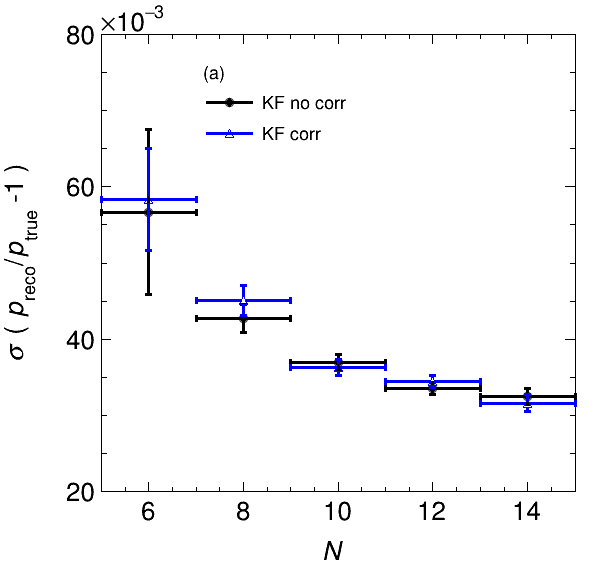

In [14]:
Xname = "#it{N}"
yrangeuser = [0.02,0.08]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw2HistosRes_fromhisto(hpResKendVSNPoints,hpResKendVSNPoints2,"h1","h2",Xname,cc,lg,"KF no corr", "KF corr",yrangeuser,2)
lg.Draw()
cc.Draw()
cc.Print(folder+"RespVSN.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (5.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (7.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (9.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (11.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (13.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (15.000000,17.000000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (5.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (7.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (9.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (11.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (13.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (15.000000,17.000000)
Info in <TCanvas::Print>: eps file /home/federico/Documents/Un

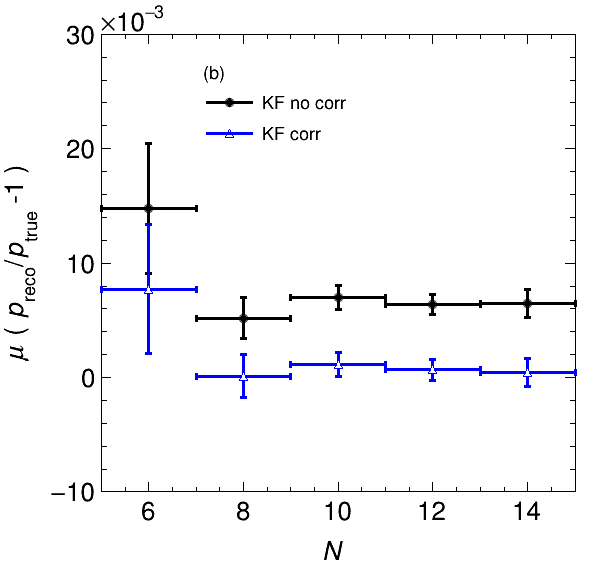

In [13]:
Xname = "#it{N}"
yrangeuser = [-0.01,0.03]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw2HistosRes_fromhisto(hpResKendVSNPoints,hpResKendVSNPoints2,"h1","h2",Xname,cc,lg,"KF no corr", "KF corr",yrangeuser,1)
lg.Draw()
cc.Draw()
cc.Print(folder+"BiaspVSN.eps")

#### p Res VS p

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (0.000000,0.500000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (0.500000,1.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (1.000000,1.500000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (1.500000,2.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (2.000000,2.500000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (2.500000,3.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (3.000000,3.500000)
Info in <TH2D::DoFitSlices>: Slice fit 7 (3.500000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 8 (4.000000,4.500000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (0.000000,0.500000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (0.500000,1.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (1.000000,1.500000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (1.500000,2.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (2.000000,2.500000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (2.500000,3.000000)
Info in <TH2D::

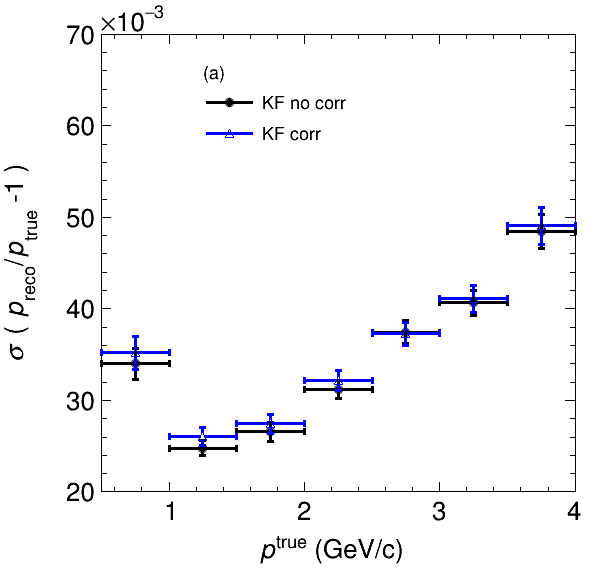

In [19]:
Xname = "#it{p}^{true} (GeV/c)"
yrangeuser = [0.02,0.07]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw2HistosRes_fromhisto(hpResKendVSp,hpResKendVSp2,"h1","h2",Xname,cc,lg,"KF no corr", "KF corr",yrangeuser,2)
lg.Draw()
cc.Draw()
cc.Print(folder+"RespVSp.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (0.000000,0.500000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (0.500000,1.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (1.000000,1.500000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (1.500000,2.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (2.000000,2.500000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (2.500000,3.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (3.000000,3.500000)
Info in <TH2D::DoFitSlices>: Slice fit 7 (3.500000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 8 (4.000000,4.500000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (0.000000,0.500000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (0.500000,1.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (1.000000,1.500000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (1.500000,2.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (2.000000,2.500000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (2.500000,3.000000)
Info in <TH2D::

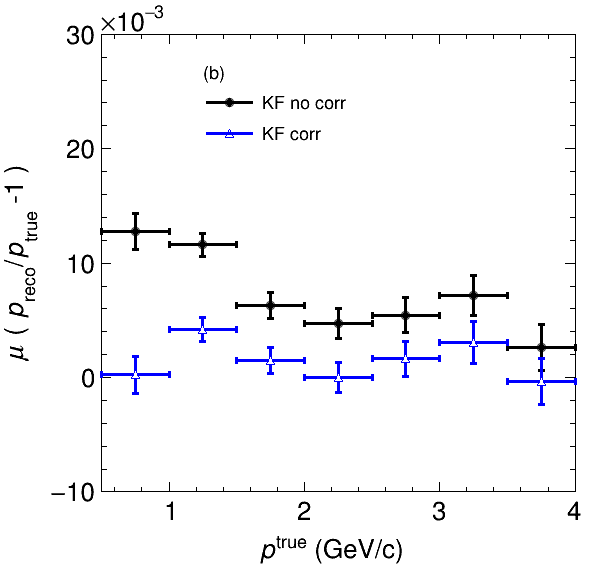

In [16]:
Xname = "#it{p}^{true} (GeV/c)"
yrangeuser = [-0.01,0.03]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw2HistosRes_fromhisto(hpResKendVSp,hpResKendVSp2,"h1","h2",Xname,cc,lg,"KF no corr", "KF corr",yrangeuser,1)
lg.Draw()
cc.Draw()
cc.Print(folder+"BiaspVSp.eps")